
## Implementation of MNIST Multilayer Perceptron Backpropgation Network
A Multi-Layer Perceptron (MLP) is a Feedforward Artificial Neural Network (ANN) model that maps sets of input data onto a set of appropriate outputs with through one or more  layers of nodes in a directed graph with each layer fully connected to the next. MLP uses Backpropagation (BP) algorithm for training the network. 

If you have not done so yet, study the MNIST Single Layer Softmax Implementation.

© Rashed Iqbal - 2018: All rights reservered.

Edited by Minxuan Wang, 06/09/2018

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data as input_data
fashion_mnist = input_data.read_data_sets('data/fashion', one_hot=True)

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


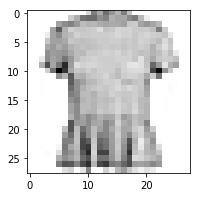

In [5]:
# Randomly show one of the images from the training dataset
import random

plt.figure(1, figsize=(3, 3))
# Get 28x28 image
sample_random = fashion_mnist.train.images[random.randint(0, 60000)].reshape(28,28)
plt.imshow(sample_random, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Model Parameters

The following parameters are defined:

**batchsize:** Training data is provided to the network in bataches. This parameter defines how many images are in a single batch.   

**cycles:** This parameter defines number of training cycles the network will undergo.   

**rate:** Learning rate is selected to ensure that the weights of the network converge to a response fast enough, without oscillations.

Often time these parameters are selected based upon trial with the data set. As MNIST is one of the most popular networks, the following parameters are often used:  

In [3]:
rate = 0.001
cycles = 20
batchsize = 50

## Network Parameters
<img src="2layermlp.gif", style="width:230px;height:180px;">
This network (as shown in the figure) will have two hidden layers. Each layer consists of 256 neurons defined by parameters neuronslayer1 and neuronslayer2. Note that an MLP is a fully connected network in that each node in a layer connects to every node in the next layer via a weight. 

In [4]:
neuronslayer1 = 256
neuronslayer2 = 256 
neuronslayer3 = 256 

Next we define number of examples in the MNIST training set:

In [6]:
numexpl = fashion_mnist.train.num_examples

##  Graph Parameters

Next we define placeholders for tensors for holding images and classes. Here specific values are not assigned to x and y. Instead, x is a placeholder for a 2-D tensor of floating point numbers (28 x 28 = 784), a value of which will be input when TensorFlow run a computation. Here None indicates that number of images (each consisting of flattened 784 values) could be any. Similarly, y is a placeholder for a 2-D tensor of floating point numbers for classes (there are ten of them: 01,2,...,9). 


In [7]:
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

##  Model Bias and Weight Parameters

Next we define and initialize biases and weights for this fully connected model. 

**Weights for Layer 1:** There will *neuronslayer1* number of neurons with the input image (of size 784 = 28 x 28) incident upon each of it. Therefore, there will be as many weights as there are neurons times size of the input image. 

**Weights for Layer 2:** As there are *neuronslayer1* number of inputs coming from layer 1 each going to layer 2, there will as many weights as there are neurons in layer 1 times neurons in layer 2. 

**Weights for the Ouput Layer:** As there are *neuronslayer2* number of inputs coming from layer 2 to 10 neurons (equal to number of classes), there will as 10 times neuronslayer2 as many weights for the output layer. 
 
**Biases:** On each layer (layer 1, layer 2, and output layer), there will be as many biases as there are neurons. So for layer 1 there will be neuronslayer1 biases, for layer 2 there will be neuronslayer2 biases, and for the output layer, there will be 10 biases. 


For implementation purposes, we will use: 

- TensorFlow Variable to create variable tensors that store weights and biases for each layer  
- Tensorflow function tf.random_normal() to initialize weights  and biases with standard normal distribution 
- a (Python) dictionary w to store weights for layer 1, layer 2, and for the output layer
- a (Python) dictionary b to store weights for layer 1, layer 2, and for the output layer

In [8]:
w = {
    'layer1': tf.Variable(tf.random_normal([784, neuronslayer1])),
    'layer2': tf.Variable(tf.random_normal([neuronslayer1, neuronslayer2])),
    'layer3': tf.Variable(tf.random_normal([neuronslayer2, neuronslayer3])),
    'layerop': tf.Variable(tf.random_normal([neuronslayer3, 10]))
}

b = {
    'layer1': tf.Variable(tf.random_normal([neuronslayer1])),
    'layer2': tf.Variable(tf.random_normal([neuronslayer2])),
    'layer3': tf.Variable(tf.random_normal([neuronslayer3])),
    'layerop': tf.Variable(tf.random_normal([10]))
}

## The MLP Model

It can be proven mathematically that an MLP with linear activation function in all neurons (which essentially is a mapping to output via linear combination of inputs and weights) may be reduced to a simple 2-layer perceptron. Recall we proved this in one of the class videos earlier during the course. The MLP however is different in that some neurons (typically all neurons in one or more layers) use a nonlinear activation function. This nonlinear function models the firing process biological neurons in the brain. 

There are several functions that are used for the activation process in MLP:  

- Hyberbolic Tangent
- Rectifier Linear Unit (ReLU) 
- Softmax Function
- Logistic Function (Logit)
- Radial Basis Functions (RBF)

We will use the ReLU in our MLP model. Known as a ramp function, for input *x*, ReLU often is defined as:

*f* ( *x* ) = max ( 0 , *x* ) 

### A Digression into Activation Functions

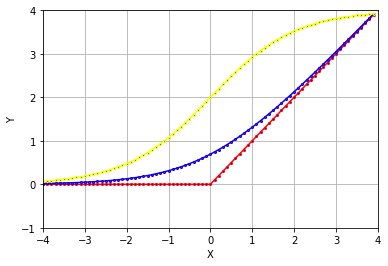

In [9]:
def ReLU(xi):
    retval = [0] * (len(xi))
    for i in range(len(xi)):
        if xi[i] > 0: retval[i] = xi[i]
        else: retval[i] = 0
    return retval

def Softmax(xi):
    retval = [0] * (len(xi))
    for i in range(len(xi)):
        retval[i] = math.log(1+math.exp(xi[i]))
    return retval

def Logit(xi):
    retval = [0] * (len(xi))
    for i in range(len(xi)):
        retval[i] = 4*(1/(1+math.exp(-xi[i])))
    return retval

import math
import numpy as np

X = np.arange(-4,4,0.1)
Y = ReLU(X)

import matplotlib.pyplot as pt
%matplotlib inline
pt.axis([-4,4,-1,4])
pt.xlabel('X')
pt.ylabel('Y')
pt.grid()
pt.plot(X, Y, color='red', linestyle='solid', marker='o', 
        markerfacecolor='blue', markersize=2)
Y = Softmax(X)
pt.plot(X, Y, color='blue', linestyle='solid', marker='o', 
        markerfacecolor='red', markersize=2)
Y = Logit(X)
pt.plot(X, Y, color='yellow', linestyle='solid', marker='o', 
        markerfacecolor='green', markersize=2)

## Model Equations

The model will be governed by the following set of equations:

<img src="neqn.png", style="width:550px;height:266px;">  

These three functions map the input (a vector of size 784) to the output (a vector of 10 classes). 


## Model Implementation

The implementation of the model consists of writing a function to implement the above equations and calling those equations with input x, weigths w, and biases b:

In [10]:
def mlp_bp(x, w, b):
    oplayer1 = tf.nn.relu(tf.add(tf.matmul(x, w['layer1']), b['layer1']))
    oplayer2 = tf.nn.relu(tf.add(tf.matmul(oplayer1, w['layer2']), b['layer2']))
    oplayer3 = tf.nn.relu(tf.add(tf.matmul(oplayer2, w['layer3']), b['layer3']))
    output  = tf.matmul(oplayer3, w['layerop']) + b['layerop']
    return output

In [11]:
predictions = mlp_bp(x, w, b)

## Cost and Optimization Functions

We will use Cross-Entropy as we used for the MNIST Single Layer Softmax Implementation. The optimizer that we will use is Adaptive Moment Estimation (Adam) which is a modified form of Stochastic Gradient Descent method. 

Note that the varaible predictions (calculated by the function mlp_bp defined above) is fed to the cost function together with the output classes. 

In [12]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate = rate).minimize(cost)

## TensorFlow Session
With the graph definition in place, we are ready to run the TensorFlow session through the following code:

- The Tensorflow initializer tf.global.variables_initializer() is used to set the structure initialconditions
- A Tensorflow session is defined
- The TensorFlow session is started with the initial conditions structure (initial coditions) 
- Number of batches (numbatches) by dividing total examples available (numexpl) by example per batch (batchsize)
- A list avgcost[] is created to store cost for all cycles (for later plotting)
- Optimzation cycles are run. For each cycle, a variable cyclecost is initilaized to zero to accumulate cost from all batches during the cycle runs. Message is pritned that the cycle is being run. 
- For each batch (for a total of numbatches) in the cycle:    
    * xbatch and ybatch are extracted from the batch
    * optimizer and cost operations are run to determine cost for this batch run 
    * batchcost is accumulated in cyclecost variable 
- For the cycle average cost is calculated by dividing cycle cost by number of batches (numbataches) and put in the list for later printing.
- Cycle cost is printed.

In [13]:
initialcondition = tf.global_variables_initializer()
session = tf.InteractiveSession()
session.run(initialcondition)
numbatches = int(numexpl/batchsize)
avgcost = [0.0] * cycles
for cycle in range(cycles):
    cyclecost = 0.0
    print("Running Cycle:", cycle, end = "") 
    for i in range(numbatches):
        xbatch, ybatch = fashion_mnist.train.next_batch(batchsize)
        _, batchcost = session.run([optimizer, cost], feed_dict={x: xbatch, y: ybatch})
        cyclecost += batchcost 
    avgcost[cycle] = cyclecost / numbatches
    print(". Completed. Cost:", avgcost[cycle])

Running Cycle: 0. Completed. Cost: 1301.07594126
Running Cycle: 1. Completed. Cost: 466.327957351
Running Cycle: 2. Completed. Cost: 304.171846395
Running Cycle: 3. Completed. Cost: 224.416994213
Running Cycle: 4. Completed. Cost: 170.569181884
Running Cycle: 5. Completed. Cost: 136.40766335
Running Cycle: 6. Completed. Cost: 108.073005303
Running Cycle: 7. Completed. Cost: 88.9785591693
Running Cycle: 8. Completed. Cost: 73.7633309674
Running Cycle: 9. Completed. Cost: 62.9640335323
Running Cycle: 10. Completed. Cost: 54.9129239352
Running Cycle: 11. Completed. Cost: 47.4697285674
Running Cycle: 12. Completed. Cost: 41.2858463627
Running Cycle: 13. Completed. Cost: 36.9896611029
Running Cycle: 14. Completed. Cost: 32.1870928183
Running Cycle: 15. Completed. Cost: 29.6672691125
Running Cycle: 16. Completed. Cost: 27.3561664638
Running Cycle: 17. Completed. Cost: 25.6033214822
Running Cycle: 18. Completed. Cost: 23.6964832549
Running Cycle: 19. Completed. Cost: 20.4436117737


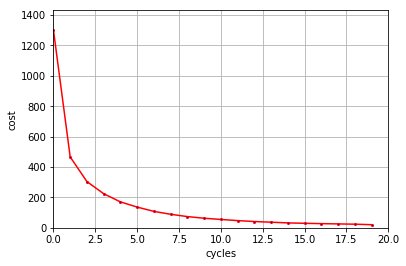

In [14]:
pt.axis([0,cycles,0,max(avgcost)*1.1])
pt.xlabel('cycles')
pt.ylabel('cost')
pt.grid()
pt.plot(avgcost, color='red', linestyle='solid', marker='o', markerfacecolor='blue', markersize=2)

## Performance Evaluations

We use Tensorflow methods tf.reduce_mean, tf.cast, and tf.argmax to determine accuracy comparing the prediction with actual class values

In [15]:
percentaccuracy = 100 * tf.reduce_mean(
                            tf.cast(tf.equal(tf.argmax(predictions, 1), 
                            tf.argmax(y, 1)), "float")).eval(
                            {x: fashion_mnist.test.images, y: fashion_mnist.test.labels})

print("Percent Accuracy: {:.2f}%".format(percentaccuracy))

Percent Accuracy: 82.50%
